<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Topic Modeling
## *Data Science Unit 4 Sprint 1 Assignment 4*

Analyze a corpus of Amazon reviews from Unit 4 Sprint 1 Module 1's lecture using topic modeling: 

- Fit a Gensim LDA topic model on Amazon Reviews
- Select appropriate number of topics
- Create some dope visualization of the topics
- Write a few bullets on your findings in markdown at the end
- **Note**: You don't *have* to use generators for this assignment

In [1]:
import gensim
import numpy as np
import os
import re
import pandas as pd

from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

C:\Users\PhatDeluxe\Anaconda3\envs\U4-S1-NLP\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
df = pd.read_csv('C:/Users/Phatdeluxe/DS-Unit-4-Sprint-1-NLP/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_products_May19.csv')
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [3]:
def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]

In [4]:
reviews_df = pd.DataFrame(data={'reviews.text': df['reviews.text']})
reviews_df['tokens'] = df['reviews.text'].apply(tokenize)

In [5]:
reviews_df.head()

,reviews.text,tokens
0,I order 3 of them and one of the item is bad q...,"[order, item, bad, quality, missing, backup, s..."
1,Bulk is always the less expensive way to go fo...,"[bulk, expensive, way, products, like]"
2,Well they are not Duracell but for the price i...,"[duracell, price, happy]"
3,Seem to work as well as name brand batteries a...,"[work, brand, batteries, better, price]"
4,These batteries are very long lasting the pric...,"[batteries, long, lasting, price, great]"


In [6]:
id2word = corpora.Dictionary(reviews_df['tokens'])

In [7]:
id2word.token2id['good']

35

In [8]:
len(id2word.keys())

9622

In [9]:
id2word.filter_extremes(no_below=5, no_above=0.95)

In [10]:
corpus = [id2word.doc2bow(text) for text in reviews_df['tokens']]

In [11]:
corpus[0][:10]

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 1),
 (7, 1),
 (8, 1),
 (9, 1)]

In [12]:
lda = LdaMulticore(corpus=corpus,
                  id2word=id2word,
                  random_state=436824,
                  num_topics=8,
                  passes=10,
                  workers=4
                  )

In [13]:
lda.print_topics()

[(0,
  '0.061*"tablet" + 0.049*"kids" + 0.031*"apps" + 0.023*"love" + 0.020*"great" + 0.017*"games" + 0.017*"use" + 0.015*"easy" + 0.014*"case" + 0.013*"year"'),
 (1,
  '0.056*"easy" + 0.050*"use" + 0.048*"great" + 0.047*"tablet" + 0.033*"price" + 0.027*"good" + 0.023*"size" + 0.019*"nice" + 0.018*"perfect" + 0.015*"screen"'),
 (2,
  '0.041*"tablet" + 0.032*"amazon" + 0.015*"ipad" + 0.014*"good" + 0.014*"great" + 0.014*"screen" + 0.013*"apps" + 0.012*"price" + 0.011*"store" + 0.011*"use"'),
 (3,
  '0.065*"kindle" + 0.017*"new" + 0.015*"screen" + 0.014*"like" + 0.014*"read" + 0.014*"love" + 0.011*"device" + 0.010*"better" + 0.009*"books" + 0.009*"reading"'),
 (4,
  '0.107*"batteries" + 0.047*"good" + 0.037*"price" + 0.031*"great" + 0.027*"long" + 0.027*"work" + 0.018*"brand" + 0.017*"amazon" + 0.013*"buy" + 0.013*"brands"'),
 (5,
  '0.054*"loves" + 0.043*"bought" + 0.042*"old" + 0.032*"year" + 0.030*"tablet" + 0.024*"games" + 0.023*"gift" + 0.021*"christmas" + 0.019*"daughter" + 0.017*"

In [14]:
words = [re.findall(r'"([^"]*)"',t[1]) for t in lda.print_topics()]

In [15]:
topics = [' '.join(t[0:5]) for t in words]

In [16]:
for id, t in enumerate(topics):
    print(f"------ Topic {id} ------")
    print(t)
    print('\n')

------ Topic 0 ------
tablet kids apps love great


------ Topic 1 ------
easy use great tablet price


------ Topic 2 ------
tablet amazon ipad good great


------ Topic 3 ------
kindle new screen like read


------ Topic 4 ------
batteries good price great long


------ Topic 5 ------
loves bought old year tablet


------ Topic 6 ------
great love product price works


------ Topic 7 ------
battery time bought use charge




In [17]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, limit, start=2, step=3, passes=5):
    """
    Compute c_v coherence for various number of topics
    
    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    series : Pandas series
    limit : max number of topics
    passes : the number of times the entire lda model & coherence values are calculated
    
    Returns:
    --------
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    
    coherence_values = []
    
    
    for iter_ in range(passes):
        for num_topics in range(start, limit, step):
            model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=dictionary, workers=4)
            coherencemodel = CoherenceModel(model=model, dictionary=dictionary, corpus=corpus, coherence='u_mass')
            coherence_values.append({'pass': iter_,
                                     'num_topics': num_topics,
                                     'coherence_score': coherencemodel.get_coherence()
                                    })
            
    return coherence_values

In [18]:
coherence_values = compute_coherence_values(dictionary=id2word,
                                           corpus=corpus,
                                           limit=40,
                                           step=3,
                                           passes=5)

In [19]:
topic_coherence = pd.DataFrame.from_records(coherence_values)

In [20]:
topic_coherence

,coherence_score,num_topics,pass
0,-2.592394,2,0
1,-2.680540,5,0
2,-2.718180,8,0
3,-2.714307,11,0
4,-2.723477,14,0
5,-2.759316,17,0
6,-2.805055,20,0
7,-2.858236,23,0
8,-2.833118,26,0
9,-2.956935,29,0


In [21]:
lda_printed = lda.print_topics()

In [22]:
topic_values = re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", str(lda_printed))

In [25]:
topic_values_float = []
topic_values_list = []
for item in topic_values:
    topic_values_float.append(float(item))
for i in range(0, 7):
    topic_values_float.remove(i)
for i in range(0, 35, 5):
    temp_list = []
    for j in range(0, 5):
        temp_list.append(topic_values_float[i + j])
    topic_values_list.append(temp_list)
topic_values_list

[[0.061, 0.049, 0.031, 0.023, 0.02],
 [0.017, 0.017, 0.015, 0.014, 0.013],
 [0.056, 0.05, 0.048, 0.047, 0.033],
 [0.027, 0.023, 0.019, 0.018, 0.015],
 [0.041, 0.032, 0.015, 0.014, 0.014],
 [0.014, 0.013, 0.012, 0.011, 0.011],
 [0.065, 0.017, 0.015, 0.014, 0.014]]

In [26]:
topics_split = []
for string in topics:
    topics_split.append(string.split())
topics_split

[['tablet', 'kids', 'apps', 'love', 'great'],
 ['easy', 'use', 'great', 'tablet', 'price'],
 ['tablet', 'amazon', 'ipad', 'good', 'great'],
 ['kindle', 'new', 'screen', 'like', 'read'],
 ['batteries', 'good', 'price', 'great', 'long'],
 ['loves', 'bought', 'old', 'year', 'tablet'],
 ['great', 'love', 'product', 'price', 'works'],
 ['battery', 'time', 'bought', 'use', 'charge']]

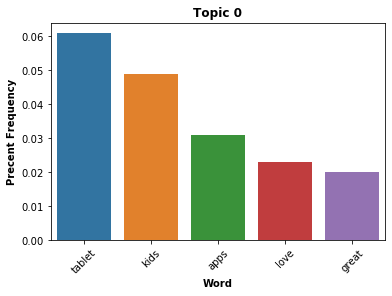

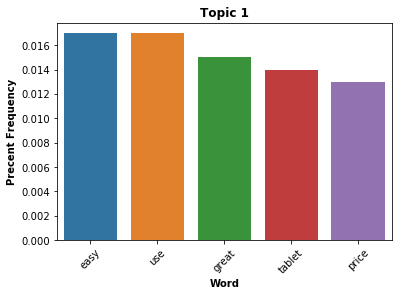

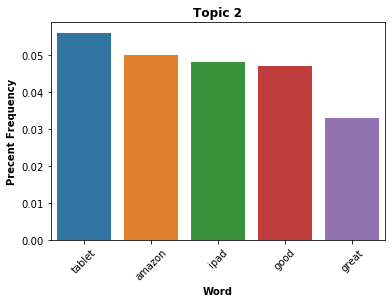

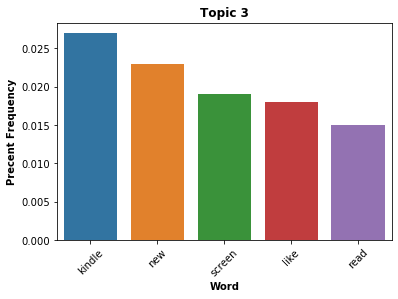

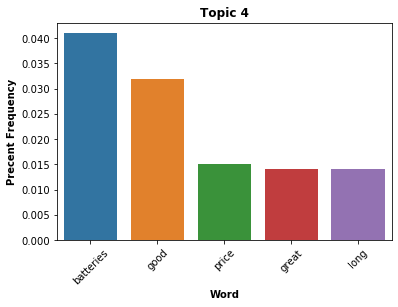

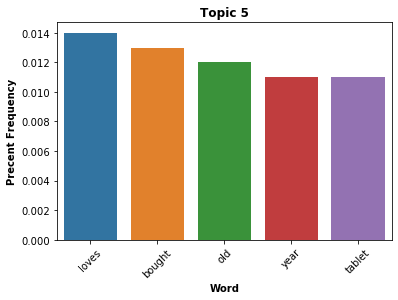

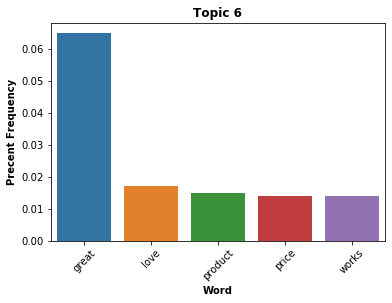

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt
for i in range (0, 7):
    sns.barplot(topics_split[i], topic_values_list[i])
    plt.title(f'Topic {i}', weight='bold')
    plt.xlabel('Word', weight='bold')
    plt.xticks(rotation=45)
    plt.ylabel('Precent Frequency', weight='bold')
    plt.show()

## Stretch Goals

* Incorporate Named Entity Recognition in your analysis
* Incorporate some custom pre-processing from our previous lessons (like spacy lemmatization)
* Analyze a dataset of interest to you with topic modeling